In [1]:
import random
import matplotlib.pyplot as plt

# So that all of you get the same random numbers
random.seed(0)

X = 4
W = random.uniform(0, 10)
B = random.uniform(0, 10)
Y_hat = 8

# Y is the neuron output
Y = W * X + B

print(f"X: {X}, W: {W}, B: {B}, Y: {Y}, Y_hat: {Y_hat}")

X: 4, W: 8.444218515250482, B: 7.579544029403024, Y: 41.35641809040495, Y_hat: 8


## Backpropagation and Training

In [2]:
## Loss function: Squared Error (SE)
L = (Y - Y_hat) ** 2
print(f"L: {L}")

L: 1112.6506278218947


In [3]:
## Gradients

# We can only update W and B, not X.
# Therefore, we calculate gradients with respect to W and B only.

# This is from the lecture notes:
dL_dY = 2 * (Y - Y_hat)  # dL/dY
dY_dW = X  # dY/dW
dY_dB = 1  # dY/dB

dL_dW = dL_dY * dY_dW  # dL/dW
dL_dB = dL_dY * dY_dB  # dL/dB

print(f"dL/dW: {dL_dW}, dL/dB: {dL_dB}")

dL/dW: 266.8513447232396, dL/dB: 66.7128361808099


In [4]:
## Weight Update

# Learning rate
alpha = 0.01

W = W - alpha * dL_dW
B = B - alpha * dL_dB
print(f"Updated W: {W}, Updated B: {B}")

Updated W: 5.775705068018086, Updated B: 6.912415667594925


In [5]:
## Repeating in Loop:

losses_single_example = []
alpha = 0.01 # Learning rate for this loop

for i in range(20):
    # Forward pass
    Y = W * X + B

    # Loss function: Squared Error (SE)
    L = (Y - Y_hat) ** 2
    losses_single_example.append(L)

    # Backward pass
    dL_dY = 2 * (Y - Y_hat)  # dL/dY
    dY_dW = X  # dY/dW
    dY_dB = 1  # dY/dB

    dL_dW = dL_dY * dY_dW  # dL/dW
    dL_dB = dL_dY * dY_dB  # dL/dB

    # Weight update
    W = W - alpha * dL_dW
    B = B - alpha * dL_dB
    print(f"Iteration {i+1}: Y: {Y}, W: {W}, B: {B}, Loss: {L}")

Iteration 1: Y: 30.015235939667267, W: 4.014486192844704, B: 6.47211094880158, Loss: 484.6706134792173
Iteration 2: Y: 22.5300557201804, W: 2.8520817352302723, B: 6.181509834397972, Loss: 211.12251923154716
Iteration 3: Y: 17.58983677531906, W: 2.0848947932047475, B: 5.989713098891591, Loss: 91.96496937726188
Iteration 4: Y: 14.329292271710582, W: 1.578551411467901, B: 5.863127253457379, Loss: 40.05994066073529
Iteration 5: Y: 12.177332899328983, W: 1.2443647795215822, B: 5.779580595470799, Loss: 17.450110151816283
Iteration 6: Y: 10.757039713557127, W: 1.023801602437012, B: 5.724439801199656, Loss: 7.601267982131165
Iteration 7: Y: 9.819646210947704, W: 0.8782299055611957, B: 5.688046876980702, Loss: 3.3111123330163372
Iteration 8: Y: 9.200966499225485, W: 0.7821525856231569, B: 5.664027546996192, Loss: 1.4423205322619173
Iteration 9: Y: 8.79263788948882, W: 0.7187415544640514, B: 5.648174789206416, Loss: 0.62827482385329
Iteration 10: Y: 8.523141007062621, W: 0.6768902738990417, B: 5

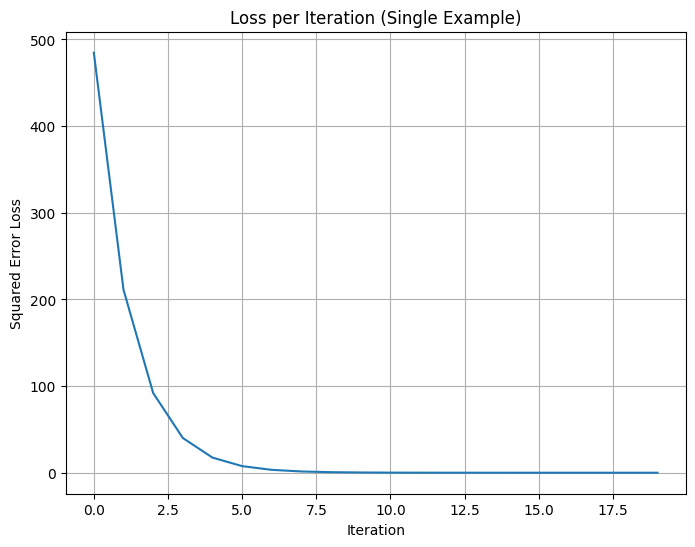

In [ ]:
## Plotting the Loss Drop

plt.figure(figsize=(8, 6))
plt.plot(losses_single_example)
plt.title("Loss per Iteration (Single Example)")
plt.xlabel("Iteration")
plt.ylabel("Squared Error Loss")
plt.grid(True)
plt.show()

### Using multiple training examples

We have reached the optimum solution for one particular problem. However, if we want to make a neuron replicate the y=2x function, we will need multiple training examples.

In [7]:
## Init

X = [4, 5, 6]
Y_hat = [8, 10, 12]

W = random.uniform(0, 10) # Re-initialize W
B = random.uniform(0, 10) # Re-initialize B

Y = [W * x + B for x in X]
print(f"X: {X}, W: {W}, B: {B}, Y: {Y}, Y_hat: {Y_hat}")

X: [4, 5, 6], W: 4.20571580830845, B: 2.5891675029296337, Y: [19.412030736163434, 23.617746544471885, 27.823462352780332], Y_hat: [8, 10, 12]


In [8]:
# Our new loss function is the mean of the squared errors (Mean Squared Error or MSE)

L = sum((y-y_hat)**2 for y, y_hat in zip(Y, Y_hat)) / len(Y)
print(f"L: {L}")

L: 188.68647576749046


In [9]:
## Multiple training iterations

losses_multiple_examples = []
alpha = 0.01

for i in range(50000):
    # Forward pass
    Y = [W * x + B for x in X]

    # Loss function: Mean Squared Error (MSE)
    L = sum((y-y_hat)**2 for y, y_hat in zip(Y, Y_hat)) / len(Y)
    losses_multiple_examples.append(L)

    # Backward pass
    dL_dY = [2 * (y - y_hat) for y, y_hat in zip(Y, Y_hat)] # dL/dY
    # For dY_dW, each X_i contributes to its respective Y_i. So dY_i/dW = X_i.
    dY_dW_list = X # This is effectively [X_0, X_1, X_2]
    dY_dB_list = [1] * len(Y)  # dY_i/dB = 1 for each example

    dL_dW = [e_dL_dY * e_dY_dW  for e_dL_dY, e_dY_dW in zip(dL_dY, dY_dW_list)] # dL/dW for each example calculated using chain rule
    dL_dB = [e_dL_dY * e_dY_dB  for e_dL_dY, e_dY_dB in zip(dL_dY, dY_dB_list)]  

    # Weight update (Batch Gradient Descent)
    # We could have also seperately updated W and B for each example, but that would be inefficient.
    # Additionally, doing an update on a batch has been shown to be more effective than updating on a single example.
    W = W - alpha * (sum(dL_dW) / len(dL_dW))
    B = B - alpha * (sum(dL_dB) / len(dL_dB))
    
    if (i + 1) % 5000 == 0 or i == 0:
        print(f"Iteration {i+1}: W: {W:.4f}, B: {B:.4f}, Loss: {L:.6f}")

Iteration 1: W: 2.8145, B: 2.3168, Loss: 188.686476
Iteration 5000: W: 1.9668, B: 0.1702, Loss: 0.000753
Iteration 10000: W: 1.9973, B: 0.0139, Loss: 0.000005
Iteration 15000: W: 1.9998, B: 0.0011, Loss: 0.000000
Iteration 20000: W: 2.0000, B: 0.0001, Loss: 0.000000
Iteration 25000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 30000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 35000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 40000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 45000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 50000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 20000: W: 2.0000, B: 0.0001, Loss: 0.000000
Iteration 25000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 30000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 35000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 40000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 45000: W: 2.0000, B: 0.0000, Loss: 0.000000
Iteration 50000: W: 2.0000, B: 0.0000, Loss: 0.000000


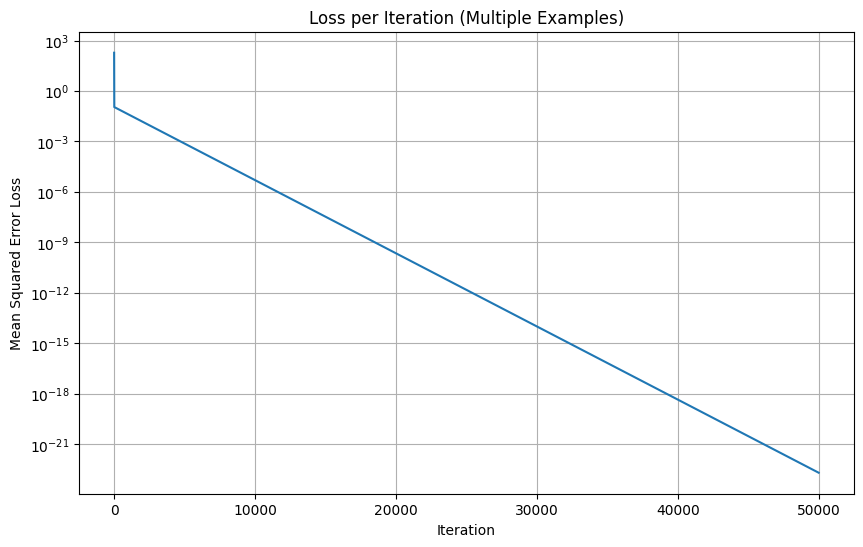

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(losses_multiple_examples)
plt.title("Loss per Iteration (Multiple Examples)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.yscale('log')
plt.grid(True)
plt.show()

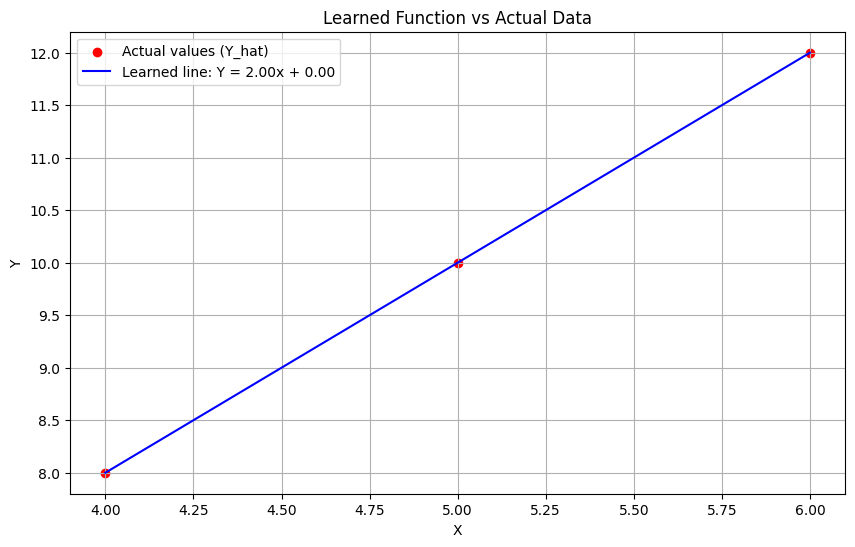

Final W: 1.9999999999945324, Final B: 2.803991388724525e-11


In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y_hat, color='red', label='Actual values (Y_hat)')

# Generate points for the learned line
line_x = sorted(list(set(X))) 
if not line_x: 
    line_x = list(range(int(min(Y_hat)-1), int(max(Y_hat)+2))) if Y_hat and all(isinstance(yi, (int, float)) for yi in Y_hat) and len(Y_hat) > 0 else [0,1]

line_y = [W * x_val + B for x_val in line_x]
plt.plot(line_x, line_y, color='blue', label=f'Learned line: Y = {W:.2f}x + {B:.2f}')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Learned Function vs Actual Data")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final W: {W}, Final B: {B}")

## Validation
- As can be seen, the values of W and B are very close to the ideal.
- Let us try seeing if our model is capable of multiplying a new number it has never encountered before by 2.

In [ ]:
x_unseen = 7

print(W * x_unseen + B)

# This is the magic of AI. It can look at a couple of examples
# and learn to predict the output for unseen data.
## We're done! Congratulations!

13.999999999989766
